In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as sps
import seaborn as sns
sns.set(style='ticks', font_scale=1.5)

import scipy.optimize

rcParams['figure.figsize'] = 13, 6

from typing import *

## Task 2

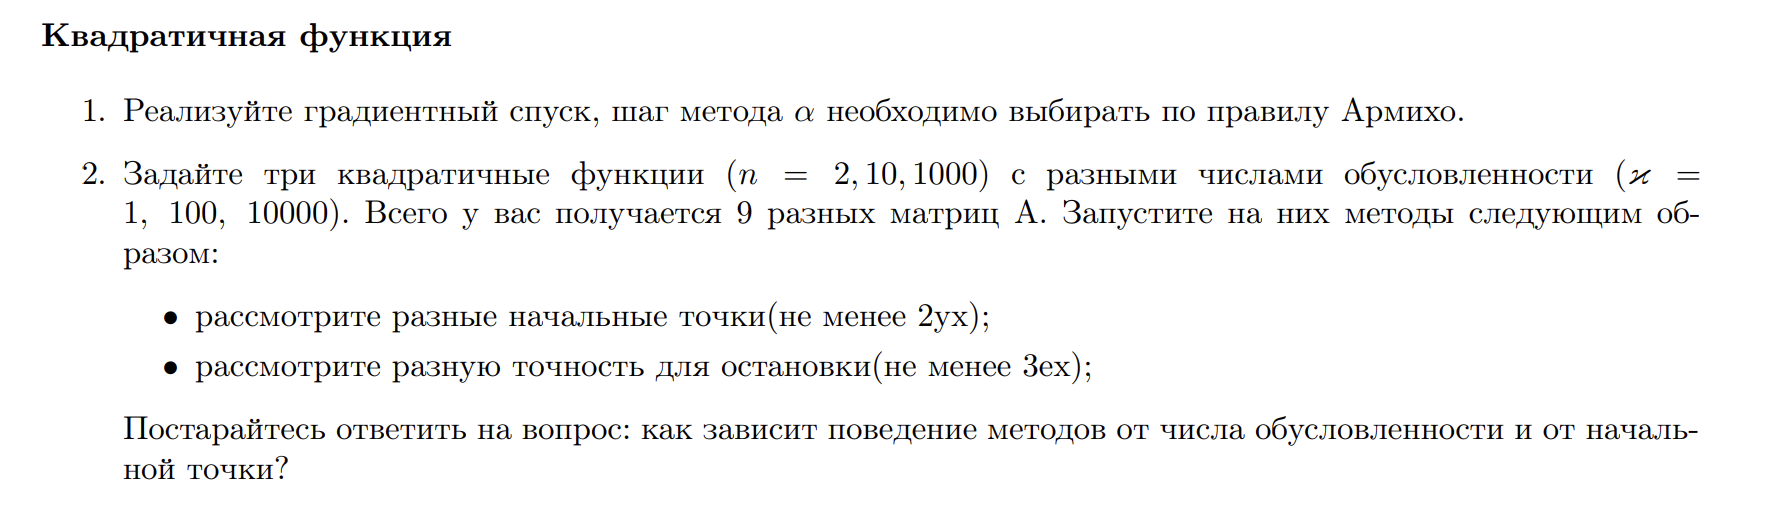

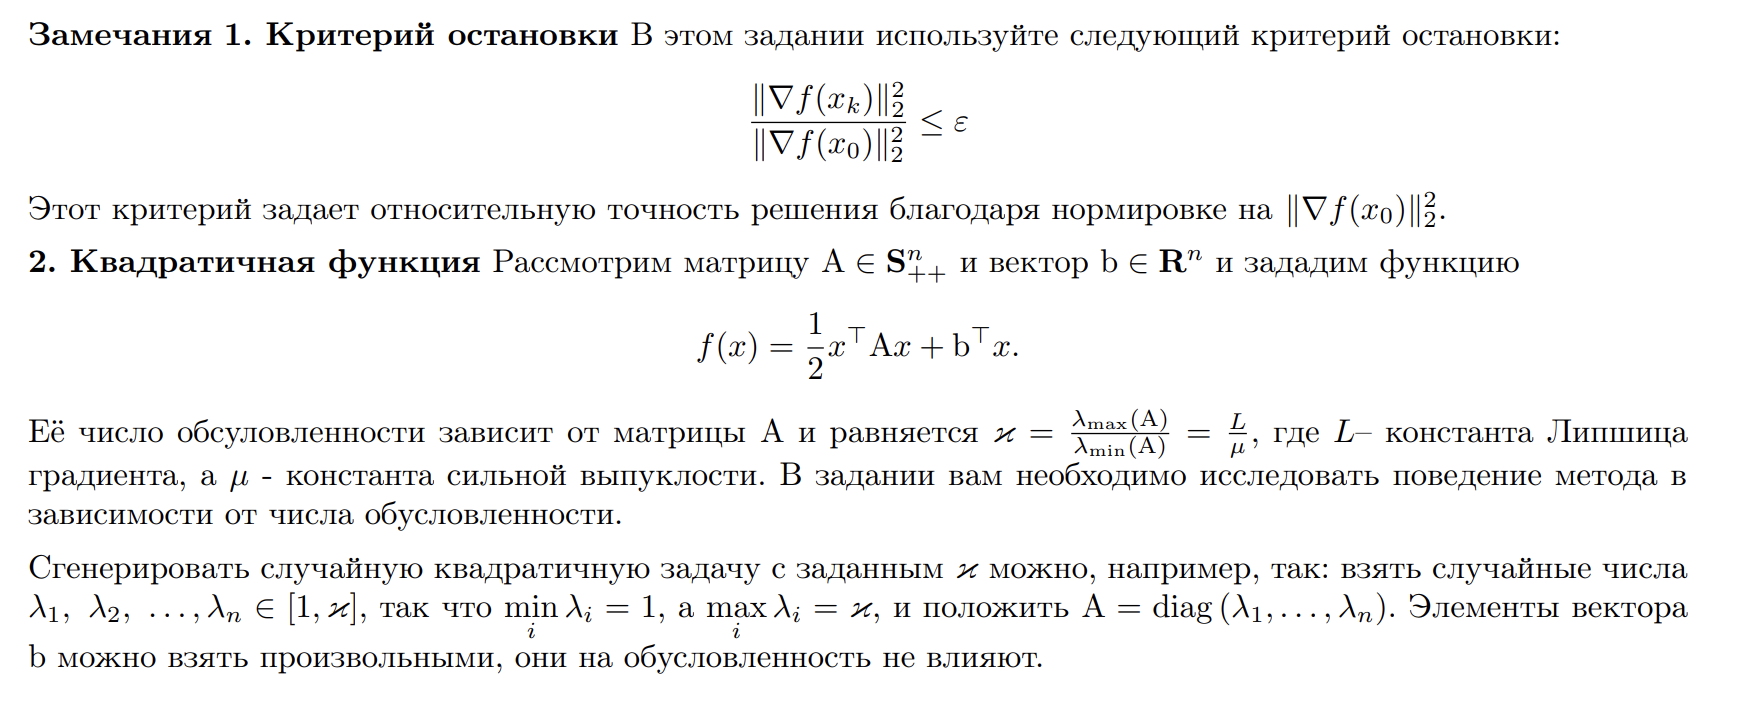

### Functions

In [2]:
def is_pos_def(M):
    """Check if matrix if positive definite"""
    return np.all(np.linalg.eigvals(M) > 0)

In [270]:
def f(x, A, b):
    """Quadratic function f(x)"""
    func = (1/2) * (x.T @ A @ x) + (b.T @ x)
    return func
    
def grad_f(x, A, b):
    """Gradient of quadratic function f(x)"""
    grad = (A @ x) + b
    return grad
    
def gessian_f(x, A, b):
    """Gessian of quadratic function f(x)"""
    return A

In [271]:
# n = 100
# cond_num = 100

# lambdas = sps.uniform(loc=1, scale=1+cond_num).rvs(size=n)
# lambdas[np.argmin(lambdas)] = 1
# lambdas[np.argmax(lambdas)] = cond_num

# A = np.diagflat(lambdas)
# b = np.random.rand(n)

# assert is_pos_def(A), "Matrix is not positive definite"

In [272]:
# N = int(1e3)
# alpha = 0.01
# eps = 0.00001

# x = np.zeros((N, n))
# f_vals = np.zeros(N)
# x[0] = np.random.rand(n)
# f_vals[0] = f(x[0], A, b)

# norm_0 = np.linalg.norm(grad_f(x[0], A, b))**2

# for k in range(N-1):
#     grad = grad_f(x[k], A, b)
#     x[k+1] = x[k] - alpha * grad
    
    
#     f_vals[k] = f(x[k], A, b)
#     norm_k = np.linalg.norm(grad_f(x[k], A, b))**2
#     stop_criteria = (norm_k / norm_0) <= eps
    
#     if stop_criteria:
#         end_iteration = k
#         print(f'GD converge at {k} iteration')
#         break


# if not stop_criteria:
#     print(f'GD didnt converge, may be need to increase N value')

In [273]:
def draw_convergence_plot(f_vals, N_iterations):
    
    plt.plot(np.arange(N_iterations), f_vals[:N_iterations], lw=3)

    plt.ylabel("Function value")
    plt.xlabel("Number of iteration")
    plt.grid()

In [293]:
def gradient_descent(n, N, alpha, eps, A, b, x0=None):
    """
    
    :param n: size of x
    :param N: maximim number of iterations
    :param alpha: initial gradient step
    :param eps: tolerance
    :param A: constant matrix from function f(x)
    :param b: constant vector from function f(x)
    :param x0: initial guess of x
    :return:
    """    
    if x0 is None:
        # x0 = (np.random.rand(n) + 10) * 5
        x0 = np.random.rand(n)
        
    x = np.zeros((N, n))
    x[0] = x0
    f_vals = np.zeros(N)
    f_vals[0] = f(x[0], A, b)

    norm_0 = np.linalg.norm(grad_f(x[0], A, b))
    
    end_iteration = N
    
    for k in range(N-1):
        # GD step 
        h_k = grad_f(x[k], A, b)
        
        # Armijo rule
        while f(x[k] - alpha * h_k, A, b) > f(x[k], A, b) + 0.2 * alpha * (h_k @ h_k):
            print(f"Armijo condition is not true, change alpha from {alpha:.6f} to {alpha/2:.6f}")
            alpha = alpha * 0.5
        
        x[k+1] = x[k] - alpha * h_k
                
        f_vals[k] = f(x[k], A, b)
        f_vals[k+1] = f(x[k+1], A, b)
        
        norm_k = np.linalg.norm(grad_f(x[k+1], A, b))
        stop_criteria = ((norm_k**2) / (norm_0**2)) <= eps
        
        if stop_criteria:
            end_iteration = k+1
            print(f'\n GD converge at {k+1} iteration, min value = {f_vals[k+1]}')
            break


    if not stop_criteria:
        print(f'\n GD didnt converge, may be need to increase number of iterations N, min value = {f_vals[k+1]}')
        print(f"current epsilon = {(norm_k**2 / norm_0**2)}")
        
        
    return f_vals, x, end_iteration, alpha

### Single experiment

In [294]:
n = 1
cond_num = 10

lambdas = sps.uniform(loc=1, scale=1+cond_num).rvs(size=n)
lambdas[np.argmin(lambdas)] = 1
lambdas[np.argmax(lambdas)] = cond_num

A = np.diagflat(lambdas)
b = np.random.rand(n)

assert is_pos_def(A), "Matrix is not positive definite"

In [295]:
N = int(1e5)
alpha = 0.5
eps = 1e-15
x0 = np.random.rand(n) + 1

f_vals, x, N_iterations, alpha = gradient_descent(n, N, alpha, eps, A, b, x0)

Armijo condition is not true, change alpha from 0.500000 to 0.250000
Armijo condition is not true, change alpha from 0.250000 to 0.125000

 GD converge at 13 iteration, min value = -0.022517106000061276


In [292]:
scipy.optimize.minimize(f, x0, args=(A, b))['fun']

-0.027685419328593554

In [234]:
alpha

0.125

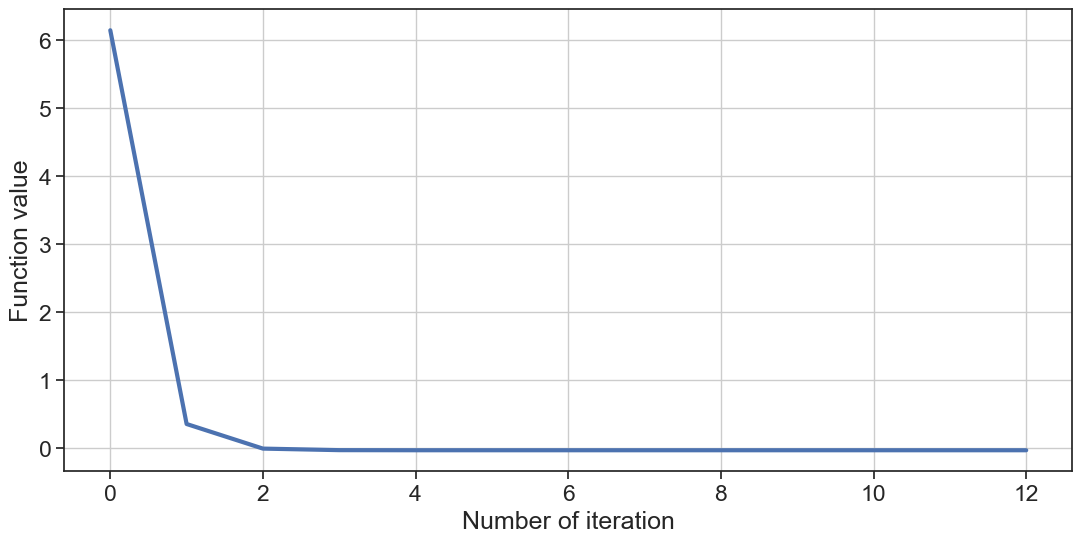

In [235]:
draw_convergence_plot(f_vals, N_iterations)

In [236]:
x0 = np.random.rand(n)
print(scipy.optimize.minimize(f, x0, args=(A, b)))

      fun: -0.026383820335904747
 hess_inv: array([[1]])
      jac: array([1.0477379e-07])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([-0.07264134])


### Multiple experiments

n = 2, condition number = 1
------------------------------------

 GD converge at 337 iteration, min value = -0.037408628777139144

----------- scipy ans = -0.03740862877714 --------------



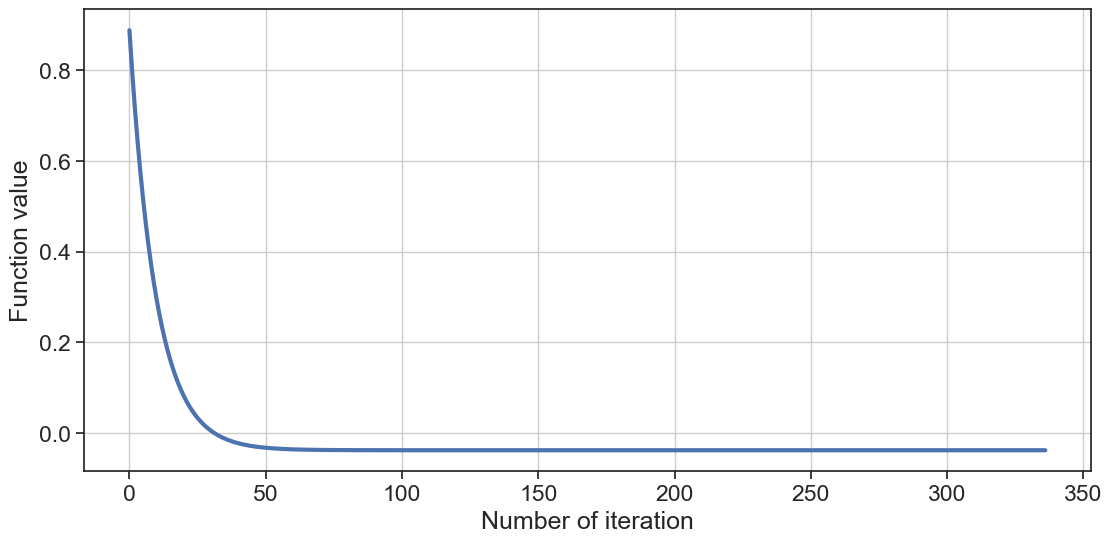

n = 2, condition number = 100
------------------------------------
Armijo condition is not true, change alpha from 0.050000 to 0.025000
Armijo condition is not true, change alpha from 0.025000 to 0.012500

 GD converge at 1038 iteration, min value = -0.2702805767268693

----------- scipy ans = -0.27028057673058015 --------------



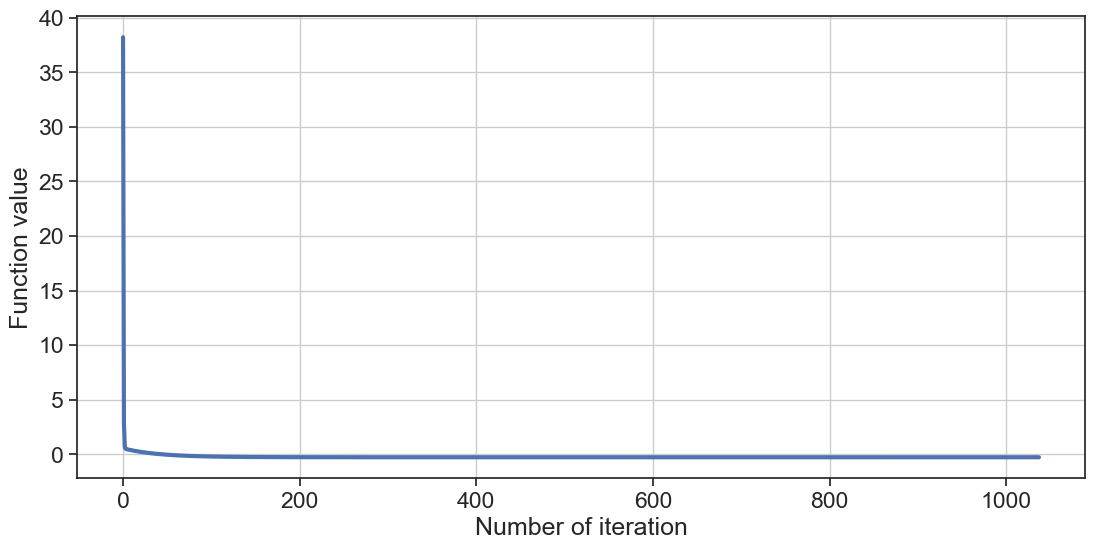

n = 2, condition number = 1000
------------------------------------
Armijo condition is not true, change alpha from 0.050000 to 0.025000
Armijo condition is not true, change alpha from 0.025000 to 0.012500
Armijo condition is not true, change alpha from 0.012500 to 0.006250
Armijo condition is not true, change alpha from 0.006250 to 0.003125
Armijo condition is not true, change alpha from 0.003125 to 0.001563

 GD converge at 7509 iteration, min value = -0.08171916267250871

----------- scipy ans = -0.08171916264563253 --------------



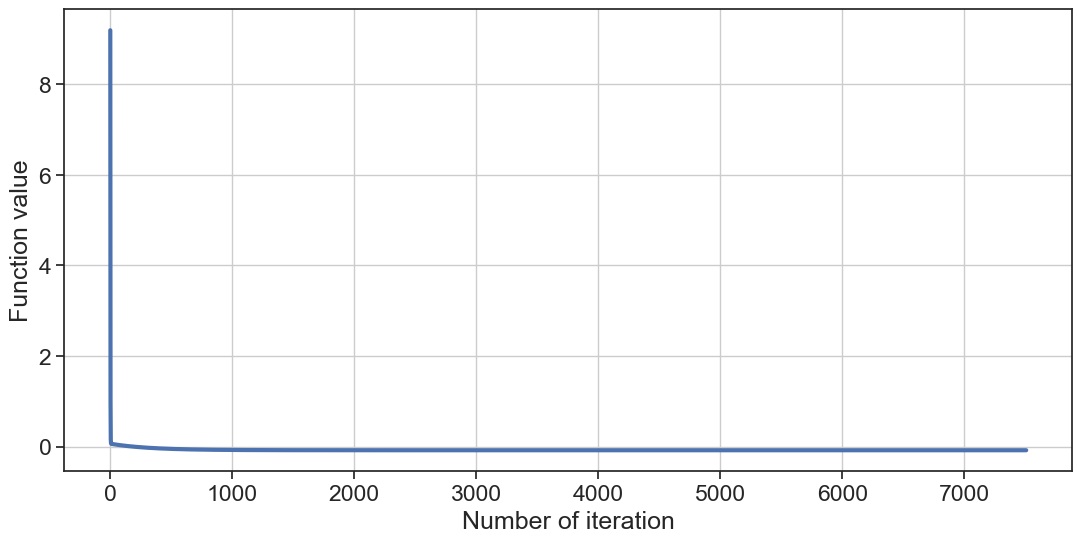

n = 10, condition number = 1
------------------------------------

 GD converge at 316 iteration, min value = -1.601073299834574

----------- scipy ans = -1.6010732998021096 --------------



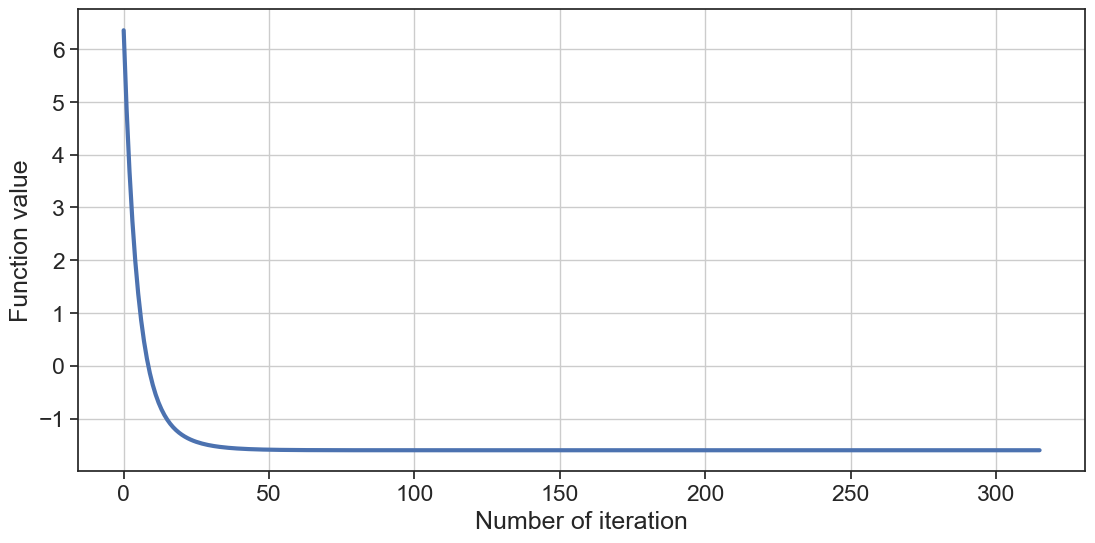

n = 10, condition number = 100
------------------------------------
Armijo condition is not true, change alpha from 0.050000 to 0.025000
Armijo condition is not true, change alpha from 0.025000 to 0.012500

 GD converge at 1047 iteration, min value = -0.3129566899627657

----------- scipy ans = -0.3129566899662272 --------------



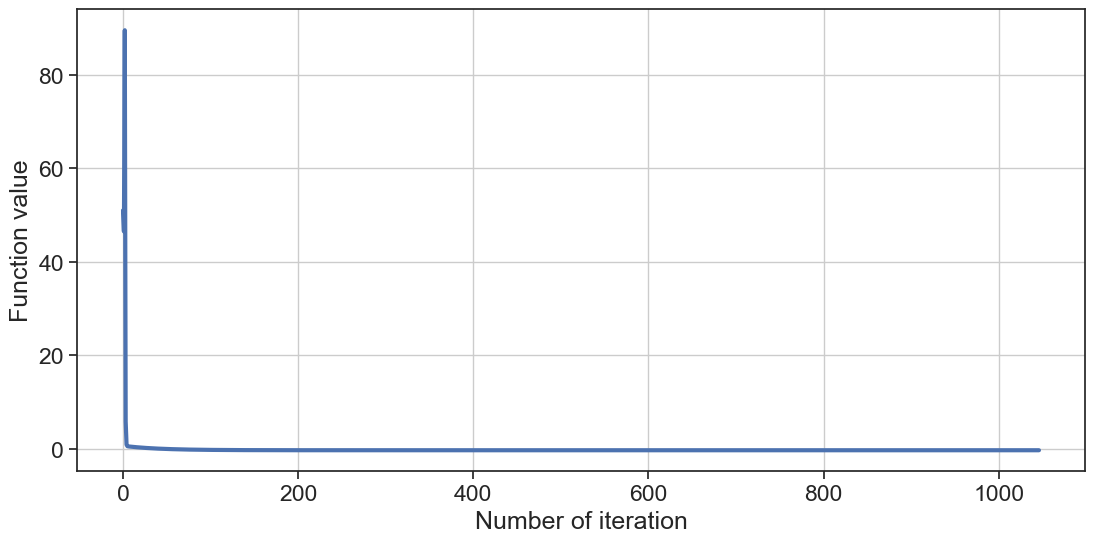

n = 10, condition number = 1000
------------------------------------
Armijo condition is not true, change alpha from 0.050000 to 0.025000
Armijo condition is not true, change alpha from 0.025000 to 0.012500
Armijo condition is not true, change alpha from 0.012500 to 0.006250
Armijo condition is not true, change alpha from 0.006250 to 0.003125
Armijo condition is not true, change alpha from 0.003125 to 0.001563

 GD converge at 6758 iteration, min value = -0.03662998291653283

----------- scipy ans = -0.036629983220220604 --------------



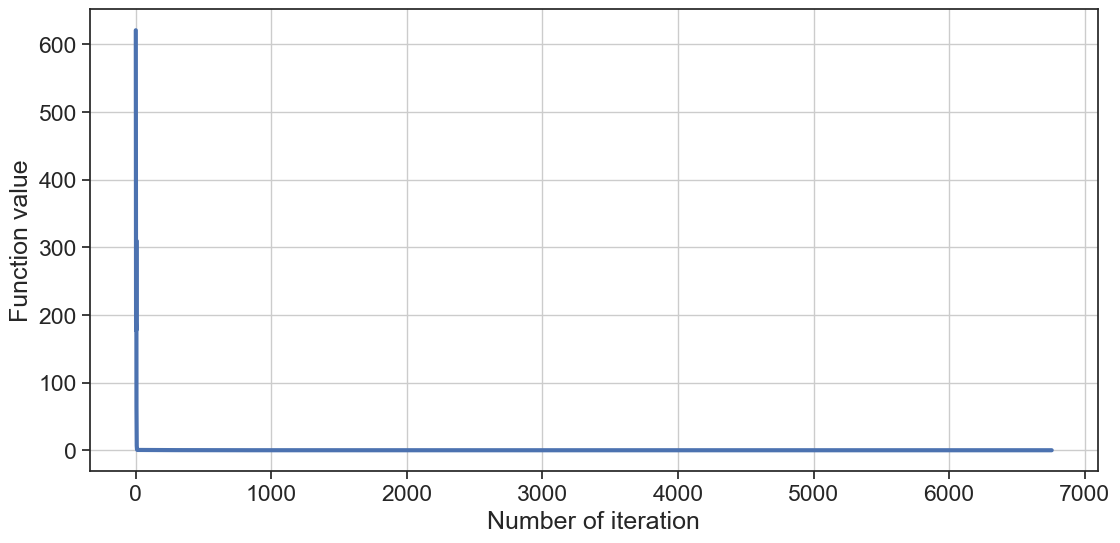

n = 1000, condition number = 1
------------------------------------

 GD converge at 288 iteration, min value = -90.40678552218803

----------- scipy ans = -90.40678552111982 --------------



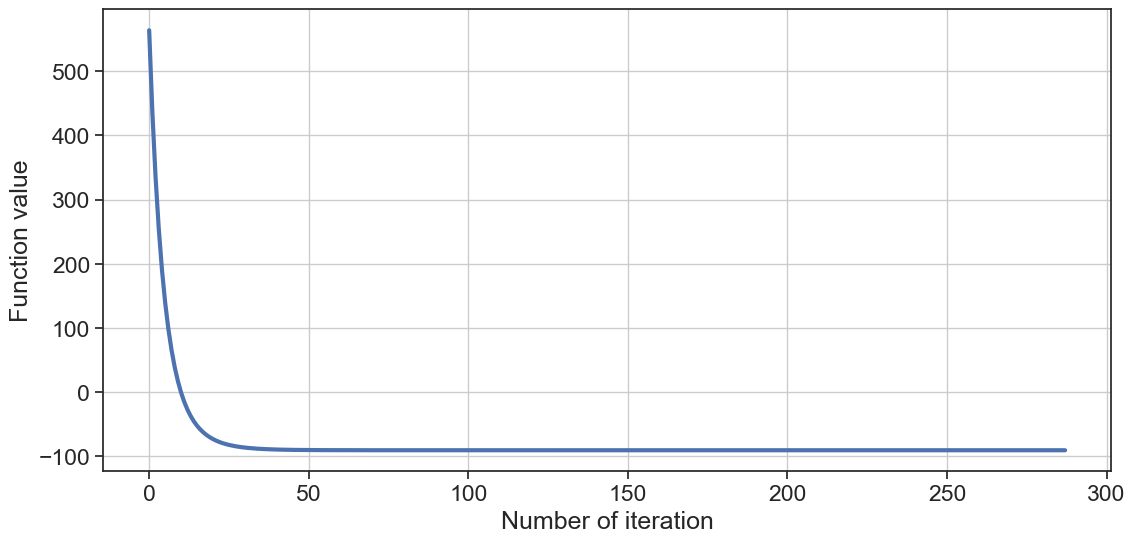

n = 1000, condition number = 100
------------------------------------
Armijo condition is not true, change alpha from 0.050000 to 0.025000
Armijo condition is not true, change alpha from 0.025000 to 0.012500

 GD converge at 838 iteration, min value = -7.395385457197813

----------- scipy ans = -7.395385457770962 --------------



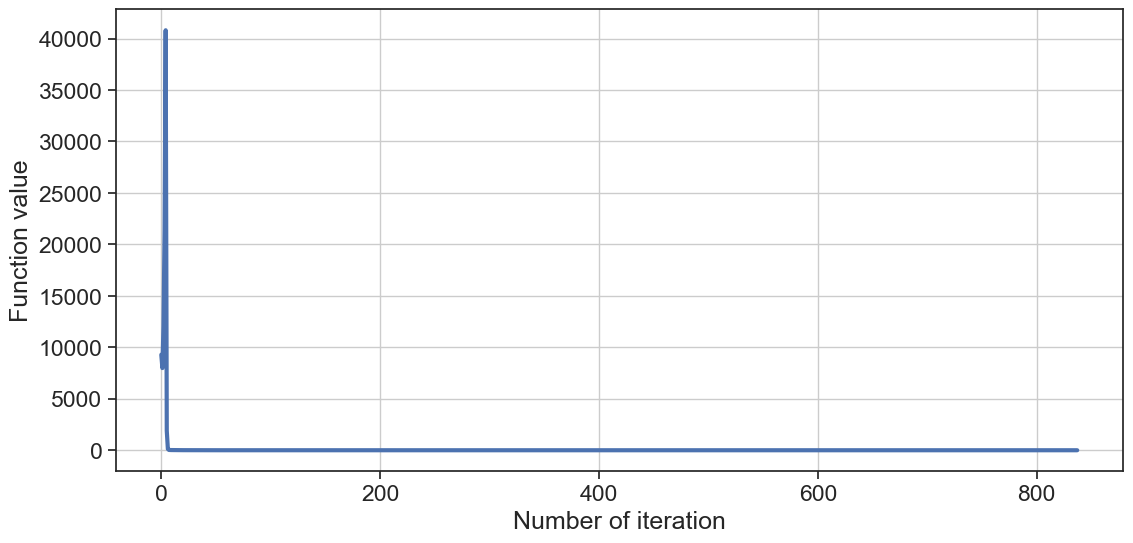

n = 1000, condition number = 1000
------------------------------------
Armijo condition is not true, change alpha from 0.050000 to 0.025000
Armijo condition is not true, change alpha from 0.025000 to 0.012500
Armijo condition is not true, change alpha from 0.012500 to 0.006250
Armijo condition is not true, change alpha from 0.006250 to 0.003125
Armijo condition is not true, change alpha from 0.003125 to 0.001563

 GD converge at 5384 iteration, min value = -1.212656557914636

----------- scipy ans = -1.2126566136402102 --------------



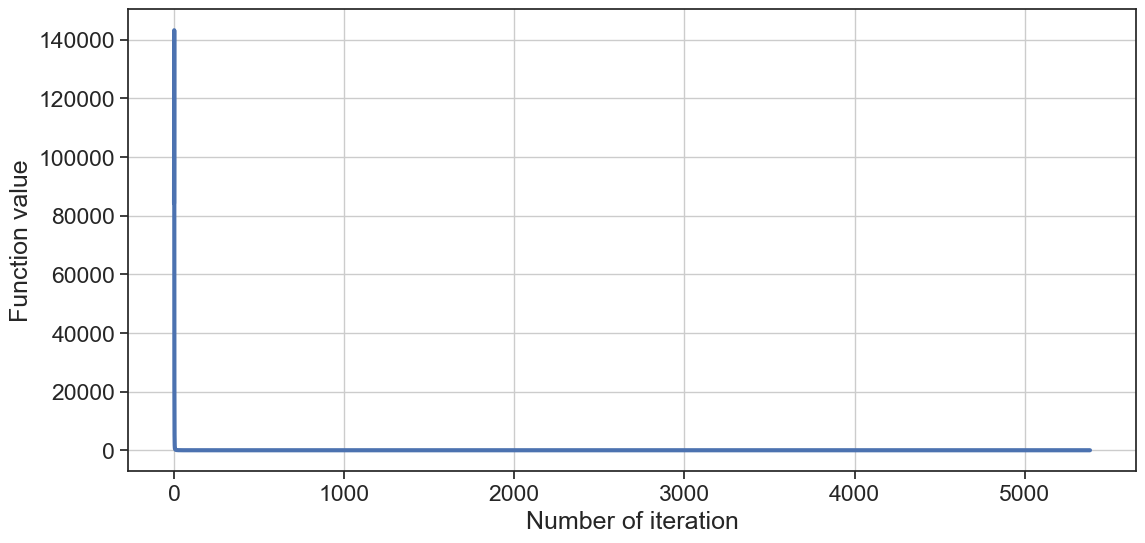

In [237]:
N = int(1e4)
eps = 1e-15

n_list = [2, 10, 1000]
cond_num_list = [1, 100, 1000]


for n in n_list:
    for cond_num in cond_num_list:
        
        alpha = 0.05
        print(f"n = {n}, condition number = {cond_num}")
        print("------------------------------------")
        
        lambdas = sps.uniform(loc=1, scale=1+cond_num).rvs(size=n)
        lambdas[np.argmin(lambdas)] = 1; lambdas[np.argmax(lambdas)] = cond_num
        A = np.diagflat(lambdas)
        b = np.random.rand(n)
        assert is_pos_def(A), "Matrix is not positive definite"
        
        x0 = np.random.rand(n)
        f_vals, x, end_iteration, alpha = gradient_descent(n, N, alpha, eps, A, b, x0=x0)
        
        print(f"\n----------- scipy ans = {scipy.optimize.minimize(f, x0, args=(A, b))['fun']} --------------\n")
        
        draw_convergence_plot(f_vals, end_iteration)
        plt.show()

## Task 3

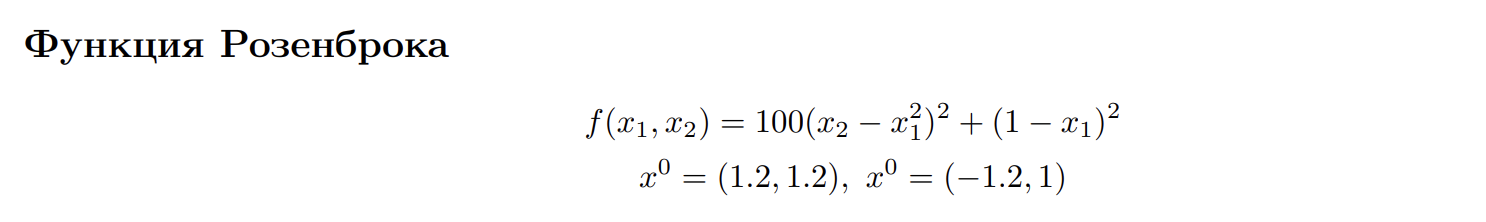


1. Аналитически найдите точку минимума.
2. Исследуйте зависимость сходимости градиентного спуска от начального приближения, шаг метода выбирать по правилу Армихо. Необходимо рассмотреть как минимум 2 разные начальные точки $x_0$ и и 3 разные точности $\varepsilon$.
3. Постройте график зависимости длины шага от итерации для каждой начальной точки. Какой вывод Вы можете сделать?



---


Функция Розенброка:
$$ f(x_1, x_2) = 100 (x_2 - x_1^2)^2 + (1 - x_1)^2 $$

Найдем точку минимума:
$$ \frac{\partial f}{\partial x_1} = - 400 x_1 (x_2 - x_1^2) + 2(x_1 - 1)  = 0 \quad \quad (1)
$$
$$ \frac{\partial f}{\partial x_2} = 200 (x_2 - x_1^2) = 0 \quad \quad (2) $$

$$ (2) \Rightarrow (x_2 - x_1^2) = 0 \rightarrow (1) \rightarrow x_1 - 1 = 0$$

$$x_1 = 1 \rightarrow (1) \Rightarrow x_2 = 1$$

**Минимум функции**:
$$ (x_1^*, x_2^*) = (1, 1); \quad f(x_1^*, x_2^*) = 0 $$


---

In [238]:
def f(x):
    """Rosenbrock function"""
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

def grad_f(x):
    """Gradient of Rosenbrock function f(x1, x2)"""
    x1, x2 = x
    grad_x = -400 * x1 * (x2 - x1**2) + 2 * (x1 - 1)
    grad_y = 200 * (x2 - x1**2)
    
    return np.array([grad_x, grad_y])


In [267]:
def gradient_descent(n, N, alpha, eps, x0=None):
    """
    
    :param n: size of x
    :param N: maximim number of iterations
    :param alpha: initial gradient step
    :param eps: tolerance
    :param x0: initial guess of x
    :return:
    """    
    if x0 is None:
        # x0 = (np.random.rand(n) + 10) * 5
        x0 = np.random.rand(n)
        
    x = np.zeros((N, n))
    x[0] = x0
    f_vals = np.zeros(N)
    f_vals[0] = f(x[0])

    norm_0 = np.linalg.norm(grad_f(x[0]))
    
    end_iteration = N
    
    for k in range(N-1):
        
        # direction
        h_k = grad_f(x[k])
        
        # Armijo rule
        while f(x[k] - alpha * h_k) > f(x[k]) + 0.4 * alpha * (h_k @ h_k):
            print(f"Armijo condition is not true, change alpha from {alpha:.6f} to {alpha/2:.6f}")
            alpha = alpha * 0.5
        
        # GD step 
        x[k+1] = x[k] - alpha * h_k
                
        f_vals[k] = f(x[k])
        f_vals[k+1] = f(x[k+1])
        
        norm_k = np.linalg.norm(grad_f(x[k+1]))
        stop_criteria = ((norm_k**2) / (norm_0**2)) <= eps
        
        if stop_criteria:
            end_iteration = k+1
            print(f'\n GD converge at {k+1} iteration, min value = {f_vals[k+1]} at point {x[k+1]}')
            break


    if not stop_criteria:
        print(f'\n GD didnt converge, may be need to increase number of iterations N, min value = {f_vals[k+1]} at point {x[k+1]}')
        print(f"current epsilon = {(norm_k**2 / norm_0**2)}")
        
        
    return f_vals, x, end_iteration, alpha

In [268]:
n = 2
N = int(1e6)
alpha = 0.1
eps = 1e-15
# x0 = np.random.rand(n)
x0 = np.array([0.001, 0.002]) * 10000

f_vals, x, N_iterations, alpha = gradient_descent(n, N, alpha, eps, x0)

Armijo condition is not true, change alpha from 0.100000 to 0.050000
Armijo condition is not true, change alpha from 0.050000 to 0.025000
Armijo condition is not true, change alpha from 0.025000 to 0.012500
Armijo condition is not true, change alpha from 0.012500 to 0.006250
Armijo condition is not true, change alpha from 0.006250 to 0.003125
Armijo condition is not true, change alpha from 0.003125 to 0.001563
Armijo condition is not true, change alpha from 0.001563 to 0.000781
Armijo condition is not true, change alpha from 0.000781 to 0.000391
Armijo condition is not true, change alpha from 0.000391 to 0.000195
Armijo condition is not true, change alpha from 0.000195 to 0.000098
Armijo condition is not true, change alpha from 0.000098 to 0.000049

 GD converge at 497787 iteration, min value = 0.00012624306836128642 at point [0.98877331 0.97762744]


чем дальше начальное приближение от истинного минимума, тем больше начальное значение функции и слабее отличия норм градиентов при расчете `eps`

Поэтому надо выкручивать `eps` практически в 0, это поможет в задачах с плохим начальным приближением (может понадобиться большое число итераций), а задачи с хорошим нач приближением не испортит

In [256]:
x0

array([10., 20.])

In [257]:
# scipy.optimize.minimize(f, x0)

In [258]:
alpha

4.8828125e-05

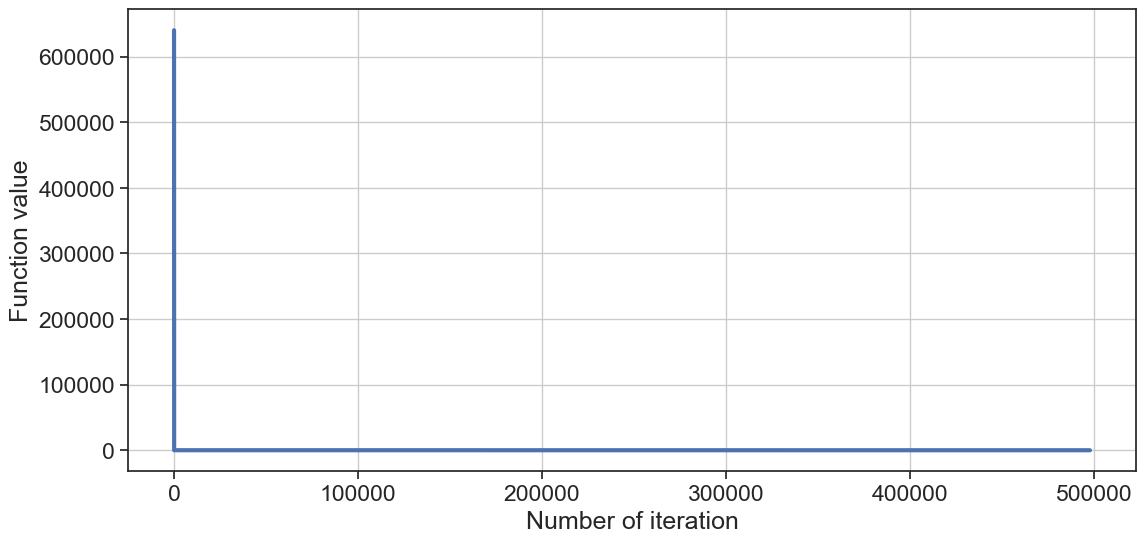

In [259]:
draw_convergence_plot(f_vals, N_iterations)

## Task 4.2

### Drafts

In [2]:
def f(x, A, b):
    return ((1/2) * x @ A @ x) + (b @ x)

def grad_f(x, A, b):
    return A @ x + b

In [3]:
A = np.array([[2, -1, -1],
              [-1, 2, 1],
              [-1, 1, 2]])

x0 = np.array([0, 0, 1])

b = np.array([1, 1, 0])

In [108]:
h0 = grad_f(x0, A, b)
h0

array([0, 2, 2])

In [110]:
grad_f(x0, A, b) @ h0

8

In [109]:
h0 @ A @ h0

24

In [111]:
(grad_f(x0, A, b) @ h0) / (h0 @ A @ h0)

0.3333333333333333

In [36]:
8 / 24

0.3333333333333333

In [37]:
x1 = x0 - (1/3) * h0
x1

array([ 0.        , -0.66666667,  0.33333333])

In [39]:
x1

array([ 0.        , -0.66666667,  0.33333333])

In [48]:
grad_f(x1, A, b)

array([1.33333333e+00, 1.11022302e-16, 1.11022302e-16])

In [51]:
A @ x1

array([ 3.33333333e-01, -1.00000000e+00,  1.11022302e-16])

In [52]:
np.array([1/3, -1, 0]) + b

array([1.33333333, 0.        , 0.        ])

In [55]:
(3 * grad_f(x1, A, b)) @ A @ h0

-15.999999999999996

In [56]:
grad_f(x1, A, b) @ A @ h0

-5.333333333333332

In [62]:
beta0 = - 2 / 9

In [68]:
h1 = grad_f(x1, A, b) - (beta0 * h0)

In [69]:
h1 = (1/9) * np.array([12, 4, 4])
h1

array([1.33333333, 0.44444444, 0.44444444])

In [101]:
alpha1 = - (grad_f(x1, A, b) @ h1) / (h1 @ A @ h1)
alpha1

-4.68750001875

In [97]:
value = 2.3703703703703702

eps = 1e-8

for numerator in range(0, 100):
    for denumerator in range(1, 100):
        drob = -numerator / denumerator
        
        if np.isclose(drob, value, rtol=0, atol=eps):
            print(f'{numerator} / {denumerator} = {value}')

In [84]:
a = 5.0000001
b = 5.00000002

np.isclose(a, b, rtol=0, atol=1e-7)

True

In [78]:
np.isclose(a, b, rtol=1e-12, atol=1e-5)

False

### Conjugate gradient method

In [2]:
def f(x, A, b):
    return ((1/2) * x @ A @ x) + (b @ x)

def grad_f(x, A, b):
    return A @ x + b

In [3]:
A = np.array([[2, -1, -1],
              [-1, 2, 1],
              [-1, 1, 2]])

x0 = np.array([0, 0, 1])

b = np.array([1, 1, 0])

In [6]:
h_prev = grad_f(x0, A, b)
h_next = grad_f(x0, A, b)
x_prev = x0
x_next = x0

# for i in range(4):  # на 4 итерации nan, возможно так и должно быть
for i in range(3):
    print(f'step {i}')
    x_prev = x_next
    h_prev = h_next
    
    alpha_prev = - (grad_f(x_prev, A, b) @ h_prev) / (h_prev @ A @ h_prev)
    print(f'alpha = {alpha_prev}')

    x_next = x_prev + alpha_prev * h_prev
    print(f'X_k = {x_prev}')
    print(f'X_k+1 = {x_next}')

    beta = (grad_f(x_next, A, b) @ A @ h_prev) / (h_prev @ A @ h_prev)
    print(f'Beta_k = {beta}')
    
    h_next = grad_f(x_next, A, b) - (beta * h_prev)
    print(h_next)
    
    assert np.isclose(h_next @ (A @ h_prev), 0, rtol=0, atol=1e-12), f"h_k and h_k+1 are not A-conjugated, {h_next @ A @ h_prev}"
    print('--------------------------------------------')

step 0
alpha = -0.3333333333333333
X_k = [0 0 1]
X_k+1 = [ 0.         -0.66666667  0.33333333]
Beta_k = -0.22222222222222218
[1.33333333 0.44444444 0.44444444]
--------------------------------------------
step 1
alpha = -0.7500000000000001
X_k = [ 0.         -0.66666667  0.33333333]
X_k+1 = [-1.00000000e+00 -1.00000000e+00 -5.55111512e-17]
Beta_k = -7.800016274768307e-33
[ 1.04000217e-32  3.46667390e-33 -1.11022302e-16]
--------------------------------------------
step 2
alpha = -0.5
X_k = [-1.00000000e+00 -1.00000000e+00 -5.55111512e-17]
X_k+1 = [-1. -1.  0.]
Beta_k = 0.0
[0. 0. 0.]
--------------------------------------------
